# Socrata API


For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

Each dataset has its own api endpoint. You can find the endpoint for a dataset by clicking on the `API` button in the top right of the dataset screen, then copying the `API Endpoint`. The default output is `JSON`, which you can leave unchanged:

![api_endpoint](assets/api_endpoint.png)

Each API is different, so it is very important to read the documentation for each API to know how to use it properly. The documentation for the SODA API is [here](https://dev.socrata.com/consumers/getting-started.html). It is **HIGHLY RECOMMENDED** that you read the documentation before making any requests, then do deeper dives into specific use cases when questions require. NOTE that the examples in the documentation don't use the `requests` package. You will need to look at the examples and figure out which things go in the `url` and which things go in the `params`.


#### Questions  

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  


3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  


4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.


#### Stretch Questions

5. Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)  


6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.  


#### Bonus

7. Socrata is used by many cities, states, and federal organizations. Find additional datasets through [Socrata's Open Data Network](http://www.opendatanetwork.com/) and do an analysis comparing them to Nashville or each other.


#### Show and Tell
At the end of the project you will present some general insights, visualizations, or other finding from any part of the project. This will be informal (showing your Jupyter notebook is fine, no need to make a powerpoint) and should be no more than 5 min. If you had challenges making your visualizations, then it is fine to discuss your experience working with the API and what you were intending to show.


In [19]:
import requests
import matplotlib.pyplot as plt
import json

endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response = requests.get(endpoint)


In [9]:
response

<Response [200]>

In [21]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [45]:

endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'

response = requests.get(endpoint)
res = response.json()


In [46]:
max_dict = max(res, key=lambda x: x["query_count"])
max_dict['month_name']

'August'

In [38]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100'

response = requests.get(endpoint)
res1 = response.json()
len(res1)

1000

In [39]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100$offset=1000'

response = requests.get(endpoint)
res2 = response.json()
len(res2)

4

In [40]:
#2
print(len(res1)+len(res2))

1004


In [49]:
#Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&$where=query_count>100'

response = requests.get(endpoint)
res = response.json()
len(res)


56

In [77]:
# Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=100000'

response = requests.get(endpoint)
res = response.json()

In [78]:
import pandas as pd
df = pd.DataFrame(res)
df

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [79]:
maps_df= df[df['query_text']=='maps']
maps_df

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
39196,November,2020,86,maps,11
39688,December,2020,113,maps,12
41188,March,2021,132,maps,3
41683,April,2021,148,maps,4


In [92]:
maps_df["date"] = pd.to_datetime(maps_df["month_name"] + " " + maps_df["year"].astype(str), format="%B %Y")
maps_df['query_count'] = maps_df['query_count'].astype(int)

C:\Users\jtbes\AppData\Local\Temp\ipykernel_51776\2450822380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df["date"] = pd.to_datetime(maps_df["month_name"] + " " + maps_df["year"].astype(str), format="%B %Y")
C:\Users\jtbes\AppData\Local\Temp\ipykernel_51776\2450822380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['query_count'] = maps_df['query_count'].astype(int)


<AxesSubplot:xlabel='date', ylabel='query_count'>

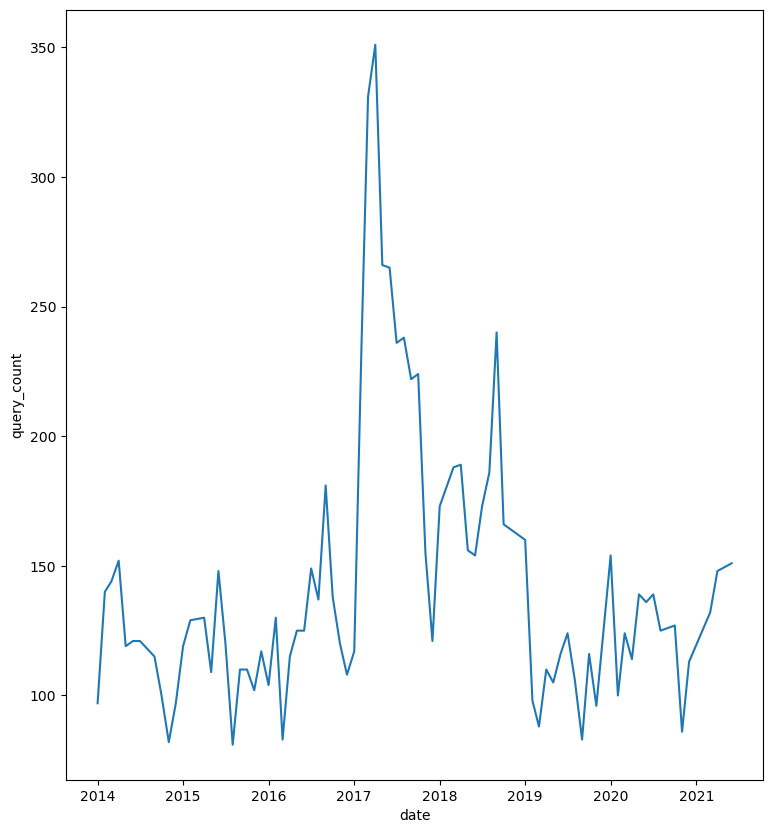

In [93]:
import seaborn as sns
plt.figure(figsize=(9,10))
sns.lineplot(data=maps_df, x="date", y="query_count")